Dataset Overview:
            x           y validity  timestamp_us     image_x     image_y  \
0  896.399292  885.012207    Valid  6.210000e+11  336.399292  870.012207   
1  895.358521  913.412659    Valid  6.210000e+11  335.358520  898.412659   
2  898.920898  927.079346    Valid  6.210000e+11  338.920898  912.079346   
3  898.977112  936.459473    Valid  6.210000e+11  338.977112  921.459473   
4  900.515686  938.411011    Valid  6.210000e+11  340.515686  923.411011   

   participant_id  gender  age             task  
0               1  Female   24  Locate the Vase  
1               1  Female   24  Locate the Vase  
2               1  Female   24  Locate the Vase  
3               1  Female   24  Locate the Vase  
4               1  Female   24  Locate the Vase  

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x 

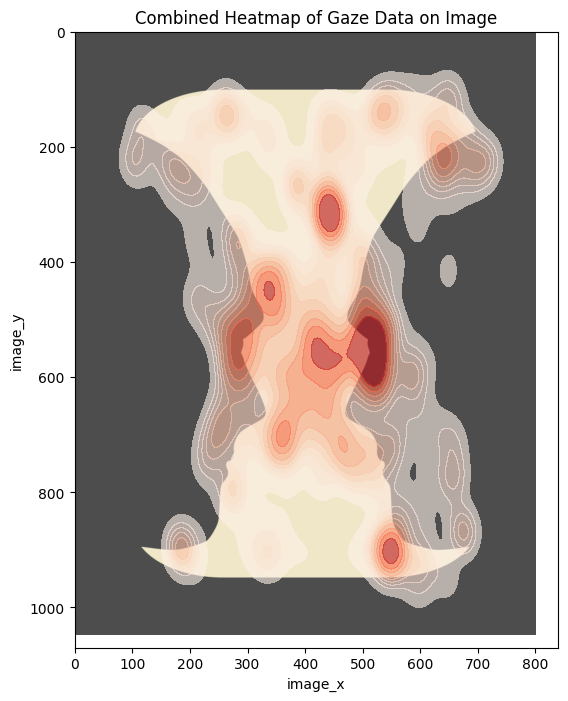

In [3]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
data_path = './all_participants_gaze_data_main.csv'
data = pd.read_csv(data_path)

# Validate required columns
required_columns = ['image_x', 'image_y', 'task', 'participant_id', 'gender', 'age']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"Missing columns in dataset: {missing_columns}")

# Step 2: Load the Image
image_path = './Rubins_vase.png'
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Image file not found at {image_path}")

# Convert image from BGR to RGB for matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Overview of the Dataset
print("Dataset Overview:")
print(data.head())
print("\nColumn Information:")
print(data.info())

# Summarize the dataset
print("\nSummary Statistics:")
print(data.describe())

print("\nParticipants:", data['participant_id'].nunique())
print("Genders:", data['gender'].unique())
print("Age Range:", data['age'].min(), "-", data['age'].max())
print("Tasks:", data['task'].unique())

# Step 4: Combined Heatmap of Gaze Data
plt.figure(figsize=(10, 8))
plt.imshow(image, alpha=0.7)
sns.kdeplot(
    x=data['image_x'], 
    y=data['image_y'], 
    cmap='Reds', 
    fill=True, 
    alpha=0.6, 
    bw_adjust=0.5
)
plt.title('Combined Heatmap of Gaze Data on Image')
plt.show()

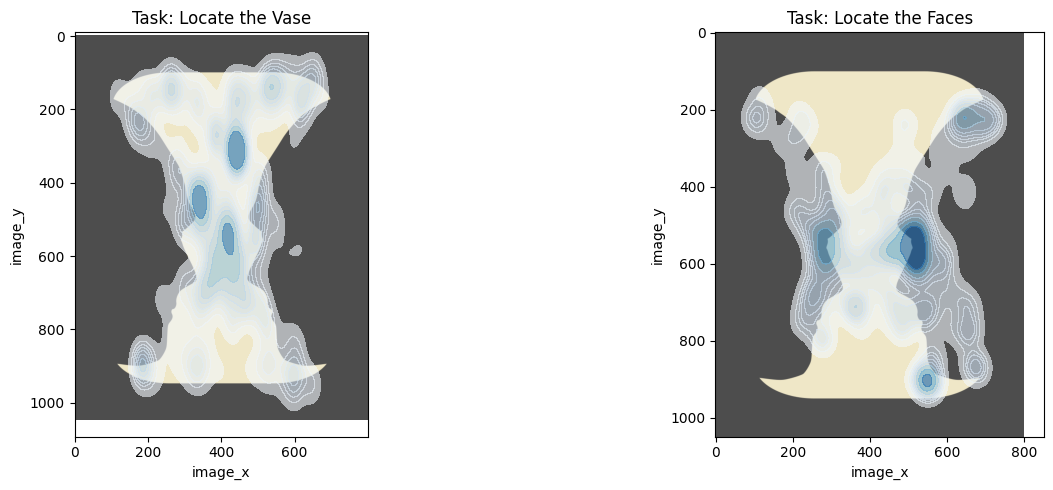

In [4]:
# Step 5: Task-Specific Heatmaps
tasks = data['task'].unique()
num_tasks = len(tasks)
num_rows = (num_tasks + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, task in enumerate(tasks):
    task_data = data[data['task'] == task]
    axes[i].imshow(image, alpha=0.7)
    sns.kdeplot(
        x=task_data['image_x'], 
        y=task_data['image_y'], 
        cmap='Blues', 
        fill=True, 
        alpha=0.6, 
        bw_adjust=0.5, 
        ax=axes[i]
    )
    axes[i].set_title(f'Task: {task}')

plt.tight_layout()
plt.show()

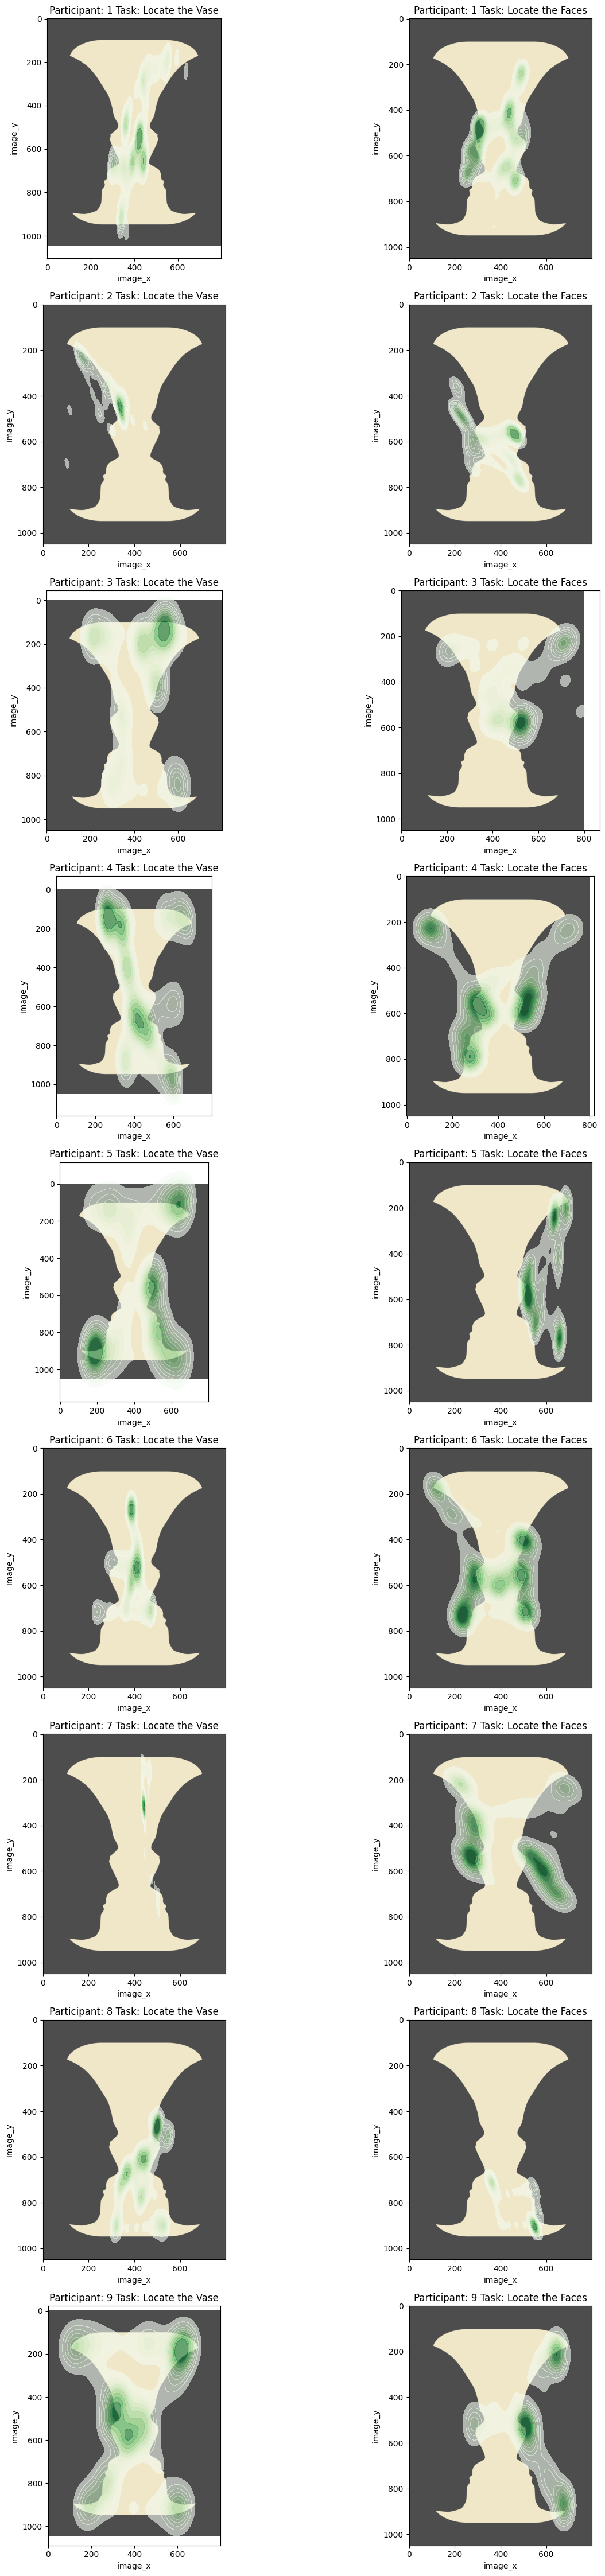

In [8]:
# Step 6: Participant-Specific Tasks Heatmaps
participant_ids = data['participant_id'].unique()
num_participant_ids = len(participant_ids)

fig, axes = plt.subplots(num_participant_ids, len(tasks), figsize=(15, 5 * num_participant_ids))
if num_participant_ids == 1:
    axes = [axes]  # Ensure axes is iterable for a single participant

for row, participant_id in enumerate(participant_ids):
    participant_data = data[data['participant_id'] == participant_id]
    for col, task in enumerate(tasks):
        task_data = participant_data[participant_data['task'] == task]
        ax = axes[row][col] if num_participant_ids > 1 else axes[col]
        ax.imshow(image, alpha=0.7)
        sns.kdeplot(
            x=task_data['image_x'], 
            y=task_data['image_y'], 
            cmap='Greens', 
            fill=True, 
            alpha=0.6, 
            bw_adjust=0.5, 
            ax=ax
        )
        ax.set_title(f'Participant: {participant_id} Task: {task}')

plt.tight_layout()
plt.show()

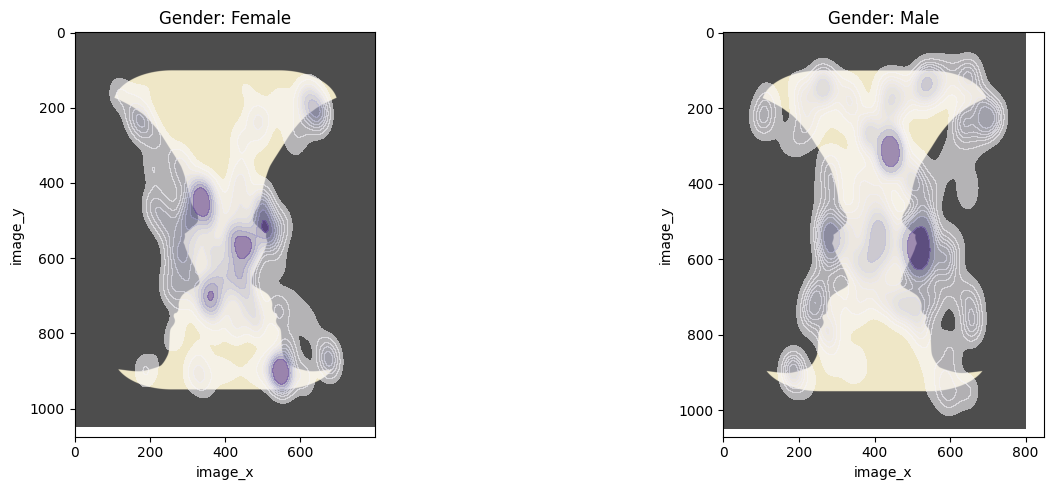

In [9]:
# Step 7: Gender Comparison
genders = data['gender'].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(15, 5))

for i, gender in enumerate(genders):
    gender_data = data[data['gender'] == gender]
    axes[i].imshow(image, alpha=0.7)
    sns.kdeplot(
        x=gender_data['image_x'], 
        y=gender_data['image_y'], 
        cmap='Purples', 
        fill=True, 
        alpha=0.6, 
        bw_adjust=0.5, 
        ax=axes[i]
    )
    axes[i].set_title(f'Gender: {gender}')

plt.tight_layout()
plt.show()


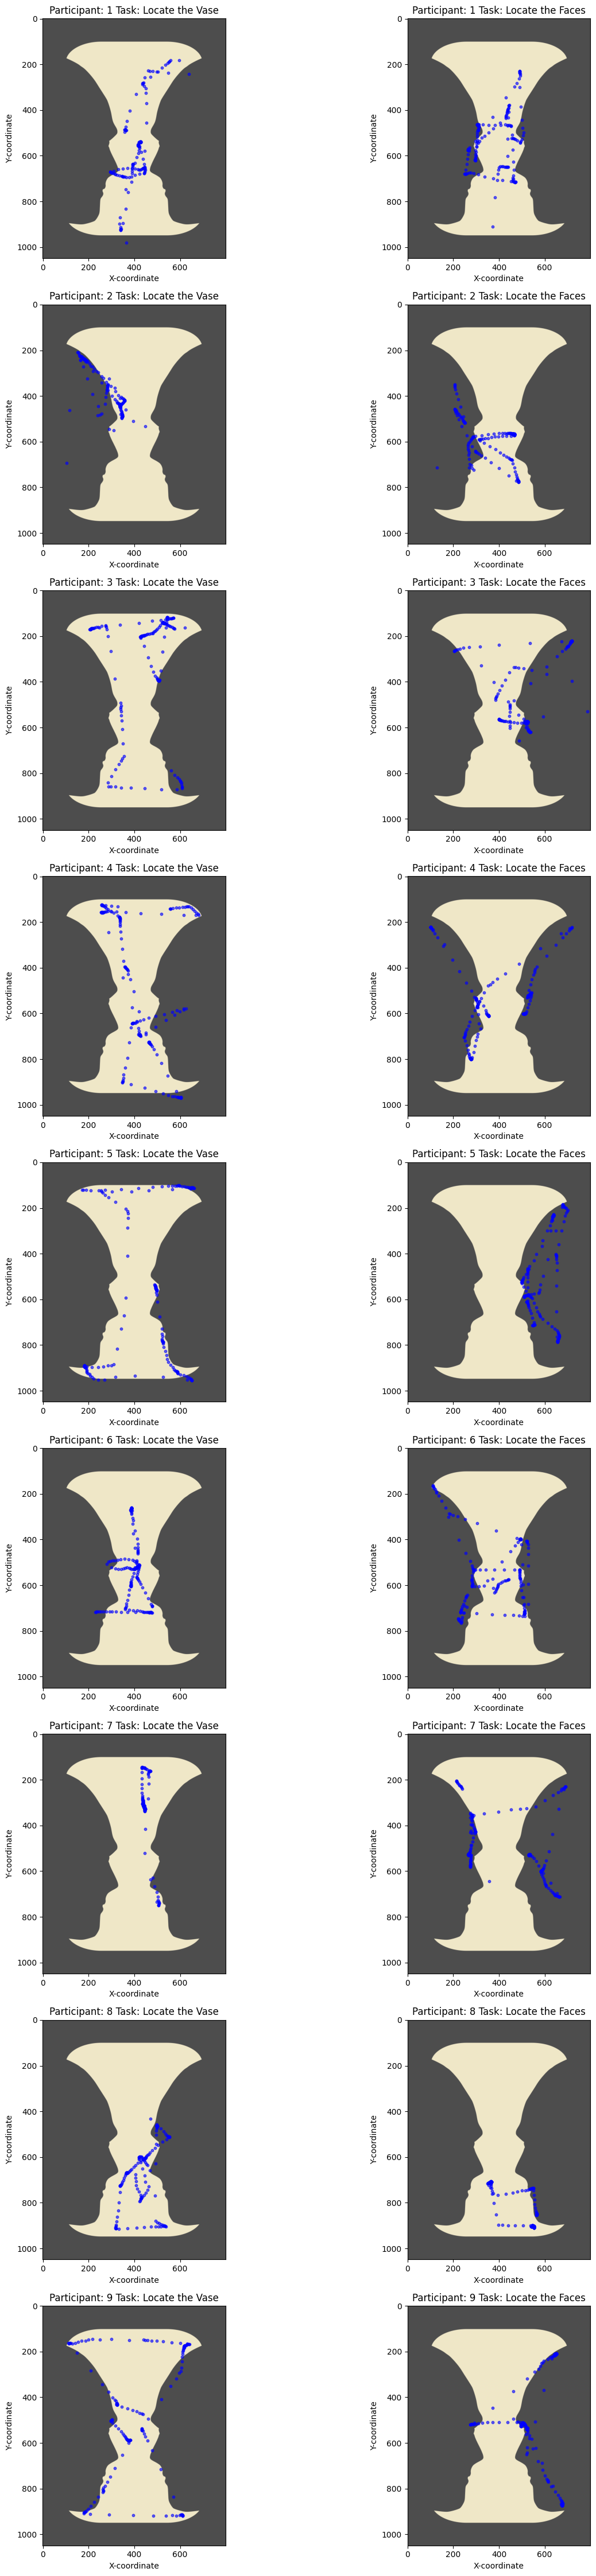

In [10]:
# Step 7: Raw Gaze Data Points for Each Participant per Task
fig, axes = plt.subplots(num_participant_ids, len(tasks), figsize=(15, 5 * num_participant_ids))
if num_participant_ids == 1:
    axes = [axes]  # Ensure axes is iterable for a single participant

for row, participant_id in enumerate(participant_ids):
    participant_data = data[data['participant_id'] == participant_id]
    for col, task in enumerate(tasks):
        task_data = participant_data[participant_data['task'] == task]
        ax = axes[row][col] if num_participant_ids > 1 else axes[col]
        ax.imshow(image, alpha=0.7)
        ax.scatter(
            task_data['image_x'], 
            task_data['image_y'], 
            c='blue', 
            s=10, 
            alpha=0.6
        )
        ax.set_title(f'Participant: {participant_id} Task: {task}')
        ax.set_xlabel('X-coordinate')
        ax.set_ylabel('Y-coordinate')

plt.tight_layout()
plt.show()

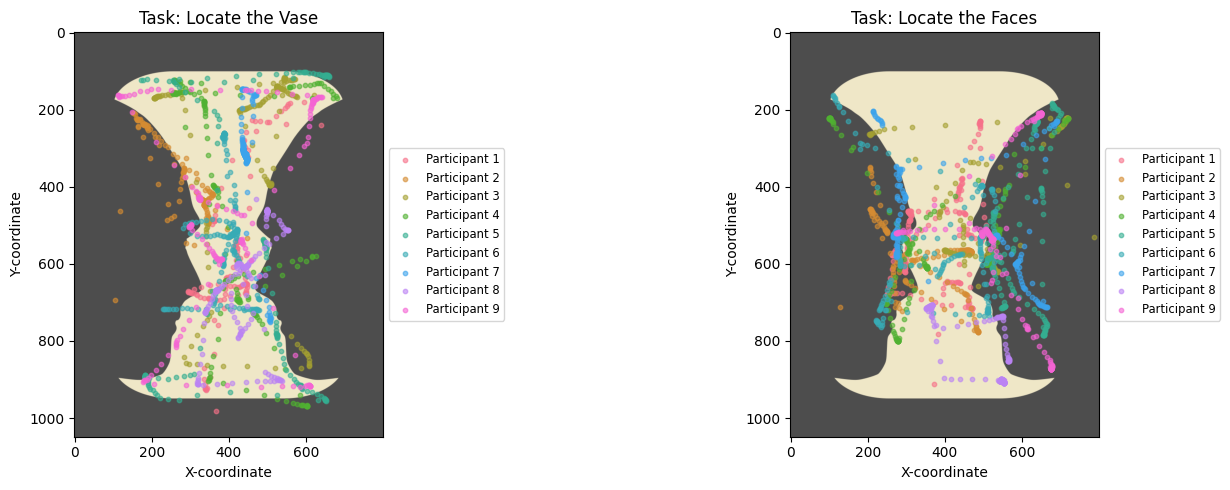

In [12]:
# Step 8: Combined Raw Gaze Data Points for Each Task (Colored by Participant)
fig, axes = plt.subplots(1, len(tasks), figsize=(15, 5))

for col, task in enumerate(tasks):
    task_data = data[data['task'] == task]
    ax = axes[col]
    ax.imshow(image, alpha=0.7)
    participants = task_data['participant_id'].unique()
    
    # Assign a unique color to each participant
    colors = sns.color_palette('husl', len(participants))
    for i, participant_id in enumerate(participants):
        participant_data = task_data[task_data['participant_id'] == participant_id]
        ax.scatter(
            participant_data['image_x'], 
            participant_data['image_y'], 
            c=[colors[i]], 
            s=10, 
            label=f'Participant {participant_id}', 
            alpha=0.6
        )
    
    ax.set_title(f'Task: {task}')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.tight_layout()
plt.show()

In [38]:
import numpy as np
def ivt_algorithm(data, velocity_threshold=40):
    """
    Implements the I-VT algorithm for eye movement classification.

    Args:
    - data: DataFrame containing gaze data.
    - velocity_threshold: Threshold to classify fixations and saccades.

    Returns:
    - fixations: List of (start, end) indices for fixations.
    - saccades: List of (start, end) indices for saccades.
    - velocities: List of computed velocities.
    """

    # Step 1: Calculate velocities
    velocities = []
    classifications = []  # Store classification for each point
    for i in range(1, len(data)):
        dx = data['image_x'].iloc[i] - data['image_x'].iloc[i - 1]
        dy = data['image_y'].iloc[i] - data['image_y'].iloc[i - 1]
        dt = data['timestamp_seconds'].iloc[i] - data['timestamp_seconds'].iloc[i - 1]
        if dt > 0:
            velocity = np.sqrt(dx**2 + dy**2) / dt
        else:
            velocity = 0
        velocities.append(velocity)

        # Classify based on threshold
        if velocity < velocity_threshold:
            classifications.append('Fixation')
        else:
            classifications.append('Saccade')

    # Step 2: Identify fixations and saccades
    fixations = []
    saccades = []
    current_start = 0
    current_type = classifications[0]

    for i, classification in enumerate(classifications + ['END']):  # Add END marker for processing last segment
        if classification != current_type or classification == 'END':
            if current_type == 'Fixation':
                fixations.append((current_start, i))
            else:
                saccades.append((current_start, i))
            current_start = i
            current_type = classification

    return fixations, saccades, velocities

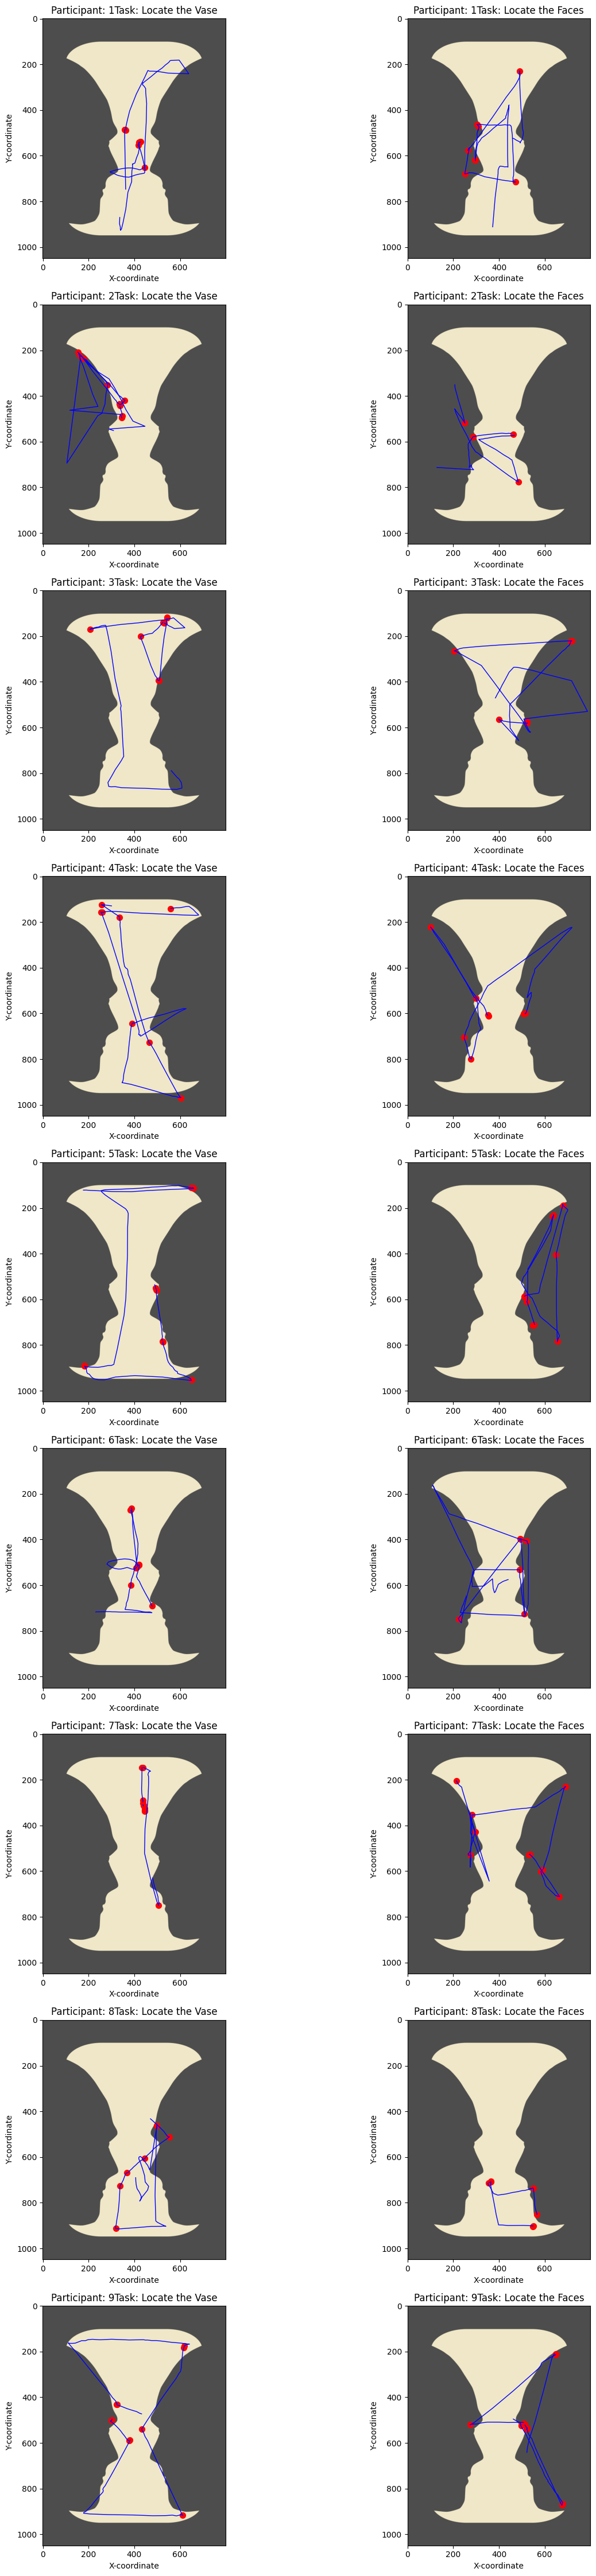

In [39]:
# Step 9: Impute Artificial Timestamps for Missing or Uniform Data
sampling_rate = 33  # Frequency in Hz
time_interval = 1_000_000 / sampling_rate  # Interval in microseconds

# Generate artificial timestamps for all data
data['timestamp_us'] = data.index * time_interval + data['timestamp_us'].min()

# Convert timestamps to seconds
data['timestamp_seconds'] = (data['timestamp_us'] - data['timestamp_us'].min()) / 1_000_000

# Step 10: Fixation Centroid and Saccade Visualization for Each Participant per Task
fig, axes = plt.subplots(num_participant_ids, len(tasks), figsize=(15, 5 * num_participant_ids))
if num_participant_ids == 1:
    axes = [axes]  # Ensure axes is iterable for a single participant

for row, participant_id in enumerate(participant_ids):
    participant_data = data[data['participant_id'] == participant_id]
    for col, task in enumerate(tasks):
        task_data = participant_data[participant_data['task'] == task]
        ax = axes[row][col] if num_participant_ids > 1 else axes[col]
        ax.imshow(image, alpha=0.7)

        # Calculate fixation centroids
        fixations, saccades, _ = ivt_algorithm(task_data, velocity_threshold=40)
        for fixation in fixations:
            start, end = fixation
            fixation_points = task_data.iloc[start:end]
            centroid_x = fixation_points['image_x'].mean()
            centroid_y = fixation_points['image_y'].mean()
            ax.scatter(centroid_x, centroid_y, c='red', s=50, label='Fixation Centroid')

        # Visualize saccades
        for saccade in saccades:
            start, end = saccade
            saccade_points = task_data.iloc[start:end]
            ax.plot(
                saccade_points['image_x'], 
                saccade_points['image_y'], 
                c='blue', linewidth=1, label='Saccade'
            )

        ax.set_title(f'Participant: {participant_id}Task: {task}')
        ax.set_xlabel('X-coordinate')
        ax.set_ylabel('Y-coordinate')

plt.tight_layout()
plt.show()



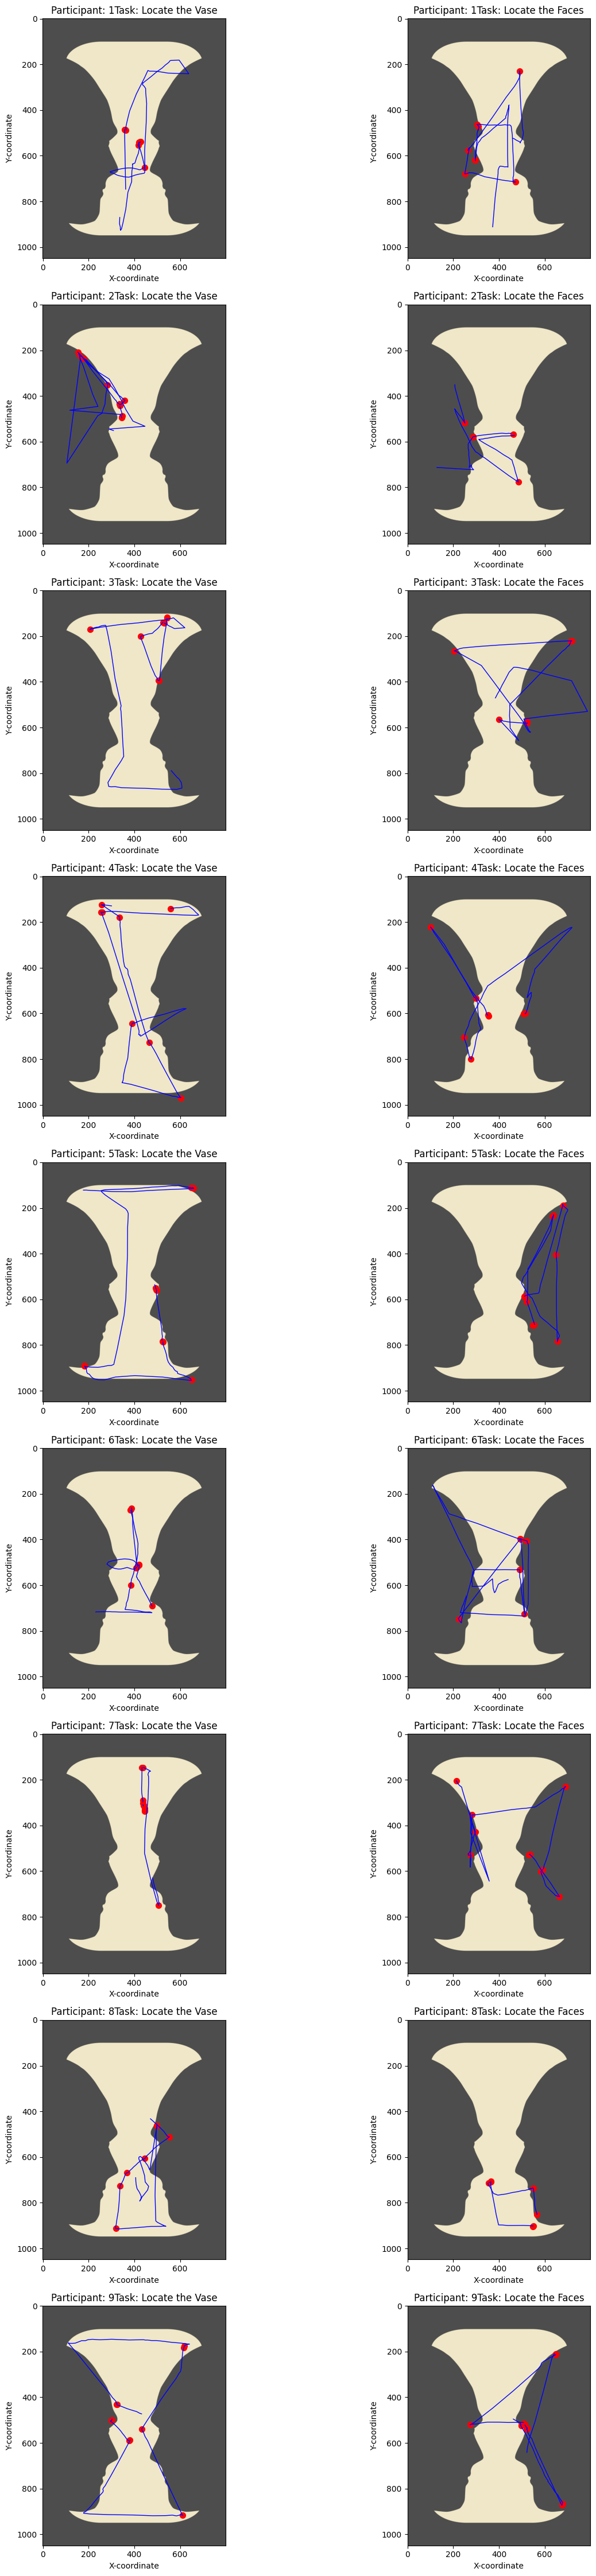

Fixation Durations by Participant and Task:
Participant 1, Task Locate the Vase: [np.float64(0.030303030273437392), np.float64(0.0), np.float64(0.18181818188476573), np.float64(0.0), np.float64(0.030303030273437503), np.float64(0.0), np.float64(0.030303030273437503), np.float64(0.0)]
Participant 1, Task Locate the Faces: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.030303030395507413), np.float64(0.030303030395507413), np.float64(0.03030303027343706), np.float64(0.0)]
Participant 2, Task Locate the Vase: [np.float64(0.0), np.float64(0.0), np.float64(0.09090909094238242), np.float64(0.03030303027343706), np.float64(0.8484848485107417), np.float64(0.21212121203613243), np.float64(0.03030303027343706), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Participant 2, Task Locate the Faces: [np.float64(0.0), np.float64(0.03030303027343706), np.float64(1.0), np.float64(0.12121212121582303), np.float64(0.0)]
Participant 3, Task Locate the Vase: [np.float6

In [41]:
# Step 10: Analyze Fixation Durations and Visualize Scanpaths for Each Task using I-VT Algorithm
fig, axes = plt.subplots(num_participant_ids, len(tasks), figsize=(15, 5 * num_participant_ids))
if num_participant_ids == 1:
    axes = [axes]  # Ensure axes is iterable for a single participant

for row, participant_id in enumerate(participant_ids):
    participant_data = data[data['participant_id'] == participant_id]
    for col, task in enumerate(tasks):
        task_data = participant_data[participant_data['task'] == task]
        ax = axes[row][col] if num_participant_ids > 1 else axes[col]
        ax.imshow(image, alpha=0.7)

        # Calculate fixations and saccades
        fixations, saccades, velocities = ivt_algorithm(task_data, velocity_threshold=40)

        # Analyze fixation durations
        fixation_durations = []
        for fixation in fixations:
            start, end = fixation
            duration = task_data['timestamp_seconds'].iloc[end - 1] - task_data['timestamp_seconds'].iloc[start]
            fixation_durations.append(duration)
            
            # Plot fixation centroid
            fixation_points = task_data.iloc[start:end]
            centroid_x = fixation_points['image_x'].mean()
            centroid_y = fixation_points['image_y'].mean()
            ax.scatter(centroid_x, centroid_y, c='red', s=50, label='Fixation Centroid')

        # Visualize scanpaths (saccades)
        for saccade in saccades:
            start, end = saccade
            saccade_points = task_data.iloc[start:end]
            ax.plot(
                saccade_points['image_x'], 
                saccade_points['image_y'], 
                c='blue', linewidth=1, label='Scanpath (Saccade)'
            )

        ax.set_title(f'Participant: {participant_id}Task: {task}')
        ax.set_xlabel('X-coordinate')
        ax.set_ylabel('Y-coordinate')

plt.tight_layout()
plt.show()

# Summary: Print fixation durations for analysis
print("Fixation Durations by Participant and Task:")
for participant_id in participant_ids:
    participant_data = data[data['participant_id'] == participant_id]
    for task in tasks:
        task_data = participant_data[participant_data['task'] == task]
        fixations, _, _ = ivt_algorithm(task_data, velocity_threshold=40)
        fixation_durations = [
            task_data['timestamp_seconds'].iloc[end - 1] - task_data['timestamp_seconds'].iloc[start]
            for start, end in fixations
        ]
        print(f"Participant {participant_id}, Task {task}: {fixation_durations}")

Participant 1, Fixation Duration Stats for Task: Locate the Vase
Mean: 0.03 seconds
Median: 0.02 seconds
Max: 0.18 seconds
Min: 0.00 seconds
Participant 1, Fixation Duration Stats for Task: Locate the Faces
Mean: 0.01 seconds
Median: 0.00 seconds
Max: 0.03 seconds
Min: 0.00 seconds
Participant 2, Fixation Duration Stats for Task: Locate the Vase
Mean: 0.12 seconds
Median: 0.02 seconds
Max: 0.85 seconds
Min: 0.00 seconds
Participant 2, Fixation Duration Stats for Task: Locate the Faces
Mean: 0.23 seconds
Median: 0.03 seconds
Max: 1.00 seconds
Min: 0.00 seconds
Participant 3, Fixation Duration Stats for Task: Locate the Vase
Mean: 0.08 seconds
Median: 0.02 seconds
Max: 0.39 seconds
Min: 0.00 seconds
Participant 3, Fixation Duration Stats for Task: Locate the Faces
Mean: 0.24 seconds
Median: 0.06 seconds
Max: 1.12 seconds
Min: 0.00 seconds
Participant 4, Fixation Duration Stats for Task: Locate the Vase
Mean: 0.03 seconds
Median: 0.02 seconds
Max: 0.09 seconds
Min: 0.00 seconds
Participan

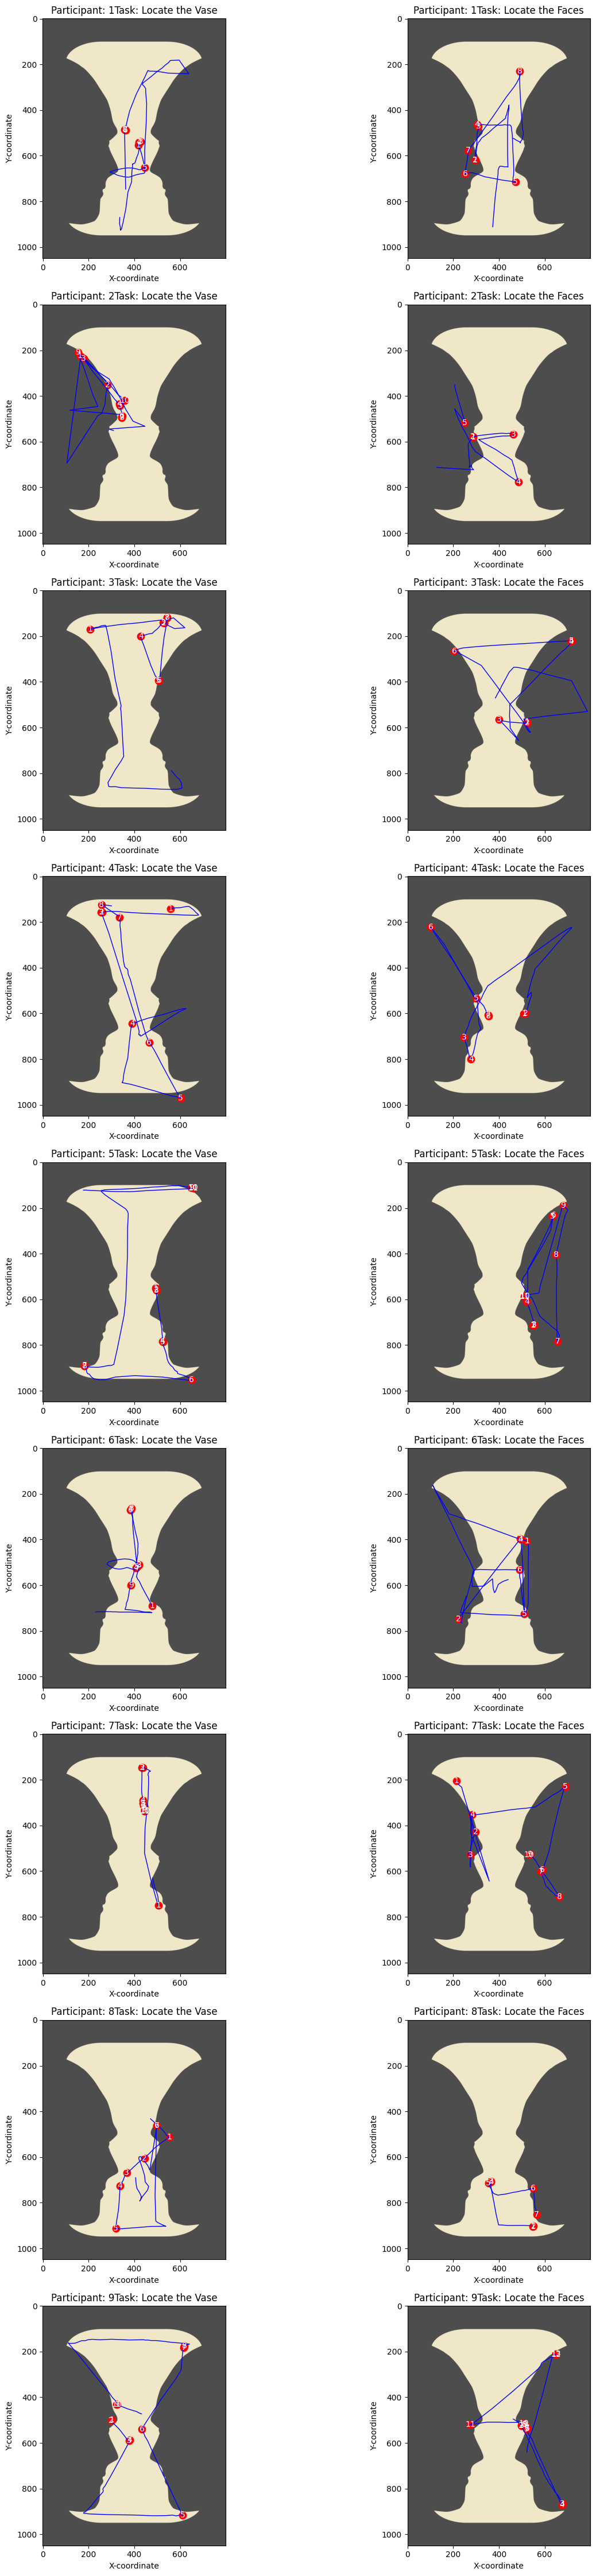

Fixation Durations by Participant and Task:
Participant 1, Task Locate the Vase: [np.float64(0.030303030273437392), np.float64(0.0), np.float64(0.18181818188476573), np.float64(0.0), np.float64(0.030303030273437503), np.float64(0.0), np.float64(0.030303030273437503), np.float64(0.0)]
Participant 1, Task Locate the Faces: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.030303030395507413), np.float64(0.030303030395507413), np.float64(0.03030303027343706), np.float64(0.0)]
Participant 2, Task Locate the Vase: [np.float64(0.0), np.float64(0.0), np.float64(0.09090909094238242), np.float64(0.03030303027343706), np.float64(0.8484848485107417), np.float64(0.21212121203613243), np.float64(0.03030303027343706), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Participant 2, Task Locate the Faces: [np.float64(0.0), np.float64(0.03030303027343706), np.float64(1.0), np.float64(0.12121212121582303), np.float64(0.0)]
Participant 3, Task Locate the Vase: [np.float6

In [44]:
# Step 10: Analyze Fixation Durations and Visualize Scanpaths for Each Task using I-VT Algorithm
fig, axes = plt.subplots(num_participant_ids, len(tasks), figsize=(15, 5 * num_participant_ids))
if num_participant_ids == 1:
    axes = [axes]  # Ensure axes is iterable for a single participant

for row, participant_id in enumerate(participant_ids):
    participant_data = data[data['participant_id'] == participant_id]
    for col, task in enumerate(tasks):
        task_data = participant_data[participant_data['task'] == task]
        ax = axes[row][col] if num_participant_ids > 1 else axes[col]
        ax.imshow(image, alpha=0.7)

        # Calculate fixations and saccades
        fixations, saccades, velocities = ivt_algorithm(task_data, velocity_threshold=40)

        # Analyze fixation durations
        fixation_durations = []
        for i, fixation in enumerate(fixations, start=1):
            start, end = fixation
            duration = task_data['timestamp_seconds'].iloc[end - 1] - task_data['timestamp_seconds'].iloc[start]
            fixation_durations.append(duration)
            
            # Plot fixation centroid with numbering
            fixation_points = task_data.iloc[start:end]
            centroid_x = fixation_points['image_x'].mean()
            centroid_y = fixation_points['image_y'].mean()
            ax.scatter(centroid_x, centroid_y, c='red', s=80, label='Fixation Centroid')  # Increased size
            ax.text(centroid_x, centroid_y, str(i), color='white', fontsize=10, ha='center', va='center')  # Adjusted color and font size

        # Visualize scanpaths (saccades)
        for saccade in saccades:
            start, end = saccade
            saccade_points = task_data.iloc[start:end]
            ax.plot(
                saccade_points['image_x'], 
                saccade_points['image_y'], 
                c='blue', linewidth=1, label='Scanpath (Saccade)'
            )

        # Output fixation duration stats
        print(f"Participant {participant_id}, Fixation Duration Stats for Task: {task}")
        print(f"Mean: {np.mean(fixation_durations):.2f} seconds")
        print(f"Median: {np.median(fixation_durations):.2f} seconds")
        print(f"Max: {np.max(fixation_durations):.2f} seconds")
        print(f"Min: {np.min(fixation_durations):.2f} seconds")

        ax.set_title(f'Participant: {participant_id}Task: {task}')
        ax.set_xlabel('X-coordinate')
        ax.set_ylabel('Y-coordinate')

plt.tight_layout()
plt.show()

# Summary: Print fixation durations for analysis
print("Fixation Durations by Participant and Task:")
for participant_id in participant_ids:
    participant_data = data[data['participant_id'] == participant_id]
    for task in tasks:
        task_data = participant_data[participant_data['task'] == task]
        fixations, _, _ = ivt_algorithm(task_data, velocity_threshold=40)
        fixation_durations = [
            task_data['timestamp_seconds'].iloc[end - 1] - task_data['timestamp_seconds'].iloc[start]
            for start, end in fixations
        ]
        print(f"Participant {participant_id}, Task {task}: {fixation_durations}")